<hr>

<h1 style="text-align: center; font-family: Arial, sans-serif; font-size: 28px;">
  Classification de la maladie Parkinson en fonction des caractéristiques vocales
</h1>

<h2 style="text-align: center; font-family: Arial, sans-serif; font-size: 24px; margin-top: 20px;">
  Module : Apprentissage Automatique
<hr>

## **Introduction**

Le projet explore l’utilisation des données vocales pour détecter la maladie de Parkinson, une affection neurodégénérative affectant principalement les mouvements. Le jeu de données, provenant du UCI Machine Learning Repository, comprend des enregistrements vocaux d’individus atteints de Parkinson et de personnes saines, avec des caractéristiques acoustiques comme la fréquence fondamentale, le jitter et le shimmer. Trois algorithmes d’apprentissage supervisé (Logistic Regression, Random Forest, LightGBM) sont appliqués pour classifier ces données. Les modèles sont évalués d'abord sur l'ensemble complet des caractéristiques, puis après une sélection de caractéristiques combinant plusieurs techniques. Ce projet vise à comparer les performances des modèles avec et sans sélection de caractéristiques, et à démontrer l'impact de cette réduction sur la précision des prédictions.

## **1. Importation du dataset**

In [50]:
import pandas as pd
import numpy as np

In [51]:
df = pd.read_csv("/assets/pd_speech_features.csv")

## **2. Exploration, pretraitement et nettoyage du dataset**

In [52]:
print(f"Nombre de ligne:{df.shape[0]}")
print(f"Nombre de colonne:{df.shape[1]}")

Nombre de ligne:757
Nombre de colonne:755


In [53]:
df.head(5)

,Unnamed: 0,Unnamed: 1,Baseline Features,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 745,Unnamed: 746,Unnamed: 747,Unnamed: 748,Unnamed: 749,Unnamed: 750,Unnamed: 751,Unnamed: 752,Unnamed: 753,Unnamed: 754
0,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1


In [54]:
header = df.iloc[0]
df = df[1:]
df.columns = header

df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1
5,1,0,0.3279,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 1 to 756
Columns: 755 entries, id to class
dtypes: object(755)
memory usage: 4.4+ MB


In [56]:
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756,756,756,756,756,756,756,756,756,756,...,756,756,756,756,756,756,756,756,756,756
unique,252,2,740,745,748,315,319,755,646,358,...,749,755,752,753,749,752,753,753,754,2
top,0,1,0.82273,0.72248,0.62128,237,236,0.006004477,7.17E-05,0.00076,...,1.7726,4.0251,2.8454,4.2105,2.6829,3.1144,12.595,4.2391,3.2941,1
freq,3,390,3,2,2,9,8,2,3,9,...,2,2,2,2,2,2,2,2,2,564


In [57]:
df = df.drop(['id'],axis=1)

df.head()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,1.76E-05,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,1.61E-05,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,1.47E-05,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,4.55E-05,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1
5,0,0.3279,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,4.37E-05,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [58]:
df = df.astype(float)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 1 to 756
Columns: 754 entries, gender to class
dtypes: float64(754)
memory usage: 4.3 MB
None


In [59]:
df.duplicated().sum()

1

In [60]:
df = df.drop_duplicates()

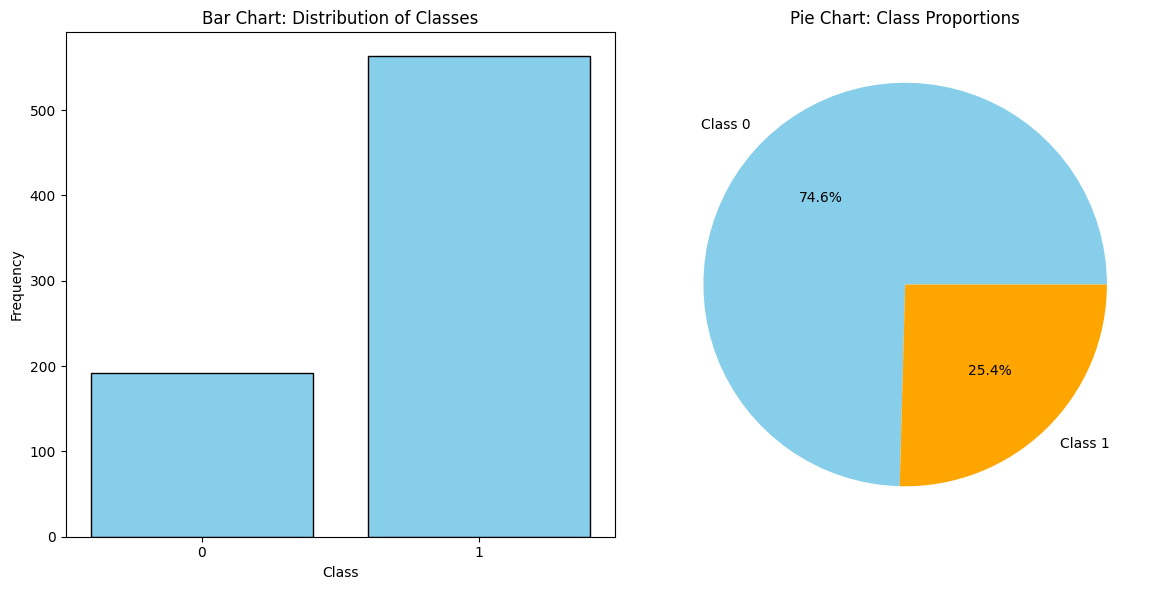

In [61]:
import matplotlib as plt
import matplotlib.pyplot as plt 

counts = df['class'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].bar(counts.index, counts.values, color='skyblue', edgecolor='black')
axes[0].set_title('Bar Chart: Distribution of Classes')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks([0, 1])

axes[1].pie(counts, labels=['Class 0', 'Class 1'], autopct='%1.1f%%', colors=['skyblue', 'orange'])
axes[1].set_title('Pie Chart: Class Proportions')

plt.tight_layout()
plt.show()

On utilise `SMOTE` (Synthetic Minority Over-sampling Technique) pour équilibrer le jeu de données en générant des exemples synthétiques pour la classe minoritaire. Cela permet de prévenir le biais des modèles de machine learning envers la classe majoritaire et d'améliorer la performance de la classification.

In [62]:
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['class'])
y = df['class']

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

balanced_data = pd.concat([pd.DataFrame(X_balanced, columns=X.columns), 
                           pd.DataFrame(y_balanced, columns=['class'])], axis=1)

print(balanced_data['class'].value_counts())

class
1.0    563
0.0    563
Name: count, dtype: int64


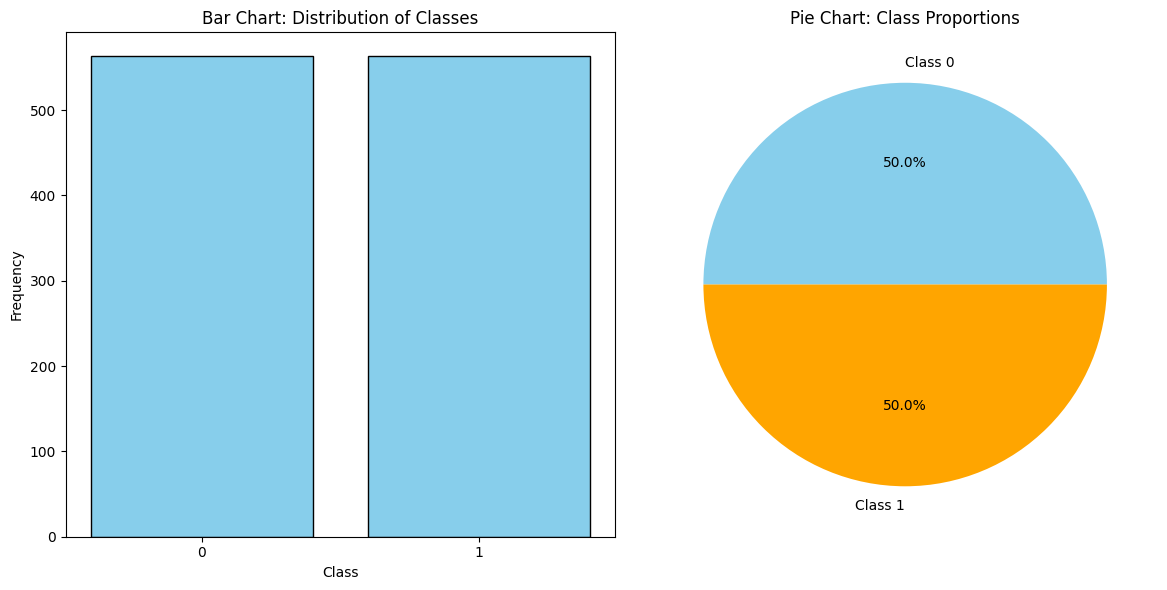

In [63]:
counts = balanced_data['class'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].bar(counts.index, counts.values, color='skyblue', edgecolor='black')
axes[0].set_title('Bar Chart: Distribution of Classes')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks([0, 1])

axes[1].pie(counts, labels=['Class 0', 'Class 1'], autopct='%1.1f%%', colors=['skyblue', 'orange'])
axes[1].set_title('Pie Chart: Class Proportions')

plt.tight_layout()
plt.show()

On utilise `StandardScaler` pour normaliser les caractéristiques de `X_balanced`, afin que chaque colonne ait une moyenne de 0 et un écart type de 1. Cela permet d'améliorer la performance des modèles de machine learning en garantissant que toutes les variables contribuent de manière égale à l'apprentissage.

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df.drop(columns=['class'])
y = df['class']

X_scaled = pd.DataFrame(scaler.fit_transform(X_balanced), columns=X.columns)

On utilise `PCA` (Analyse en Composantes Principales) pour réduire la dimensionnalité de `X_scaled` tout en conservant 95% de la variance des données. Cela simplifie le modèle et peut améliorer les performances en réduisant le bruit et la complexité computationnelle.

In [65]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
pca_df['class'] = y_balanced

print(f"Number of columns after PCA: {pca_df.shape[1]}")

Number of columns after PCA: 162


<Axes: xlabel='PC30', ylabel='class'>

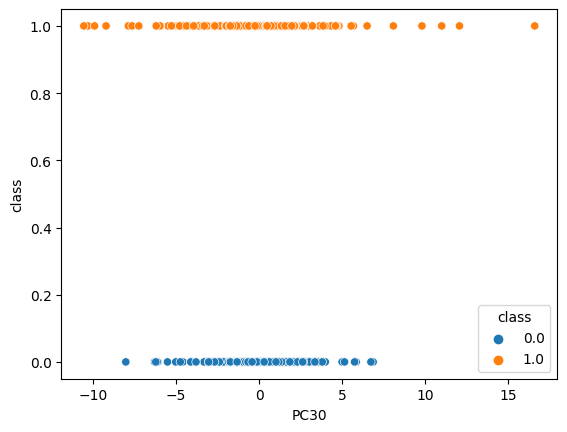

In [66]:
import seaborn as sns

sns.scatterplot(data=pca_df, x=pca_df['PC30'], y='class', hue='class', palette='tab10')

## **3. Implementation des modeles de prediction**

### **- Logistic Regression**

In [67]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def fit(X, y, learning_rate=0.01, epochs=1000):
    
    X = np.array(X, dtype=np.float64)
    y = np.array(y, dtype=np.float64)

    m, n = X.shape
    w = np.zeros((n, 1))
    b = 0

    y = y.reshape(-1, 1)

    for _ in range(epochs):
        z = np.dot(X, w) + b 
        a = sigmoid(z)        

        dz = a - y
        dw = (1 / m) * np.dot(X.T, dz)
        db = (1 / m) * np.sum(dz)

        w -= learning_rate * dw
        b -= learning_rate * db

    return w, b


def predict_lr(X, w, b, threshold=0.5):

    X = np.array(X, dtype=np.float64)

    z = np.dot(X, w) + b
    probabilities = sigmoid(z)
    predictions = (probabilities >= threshold).astype(int)

    return predictions.flatten()

def accuracy_score(y_true, y_pred):
    y_true = np.array(y_true).flatten() 
    y_pred = np.array(y_pred).flatten() 
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    accuracy = (correct / total) * 100
    return accuracy

### **- Random Forest**

In [68]:
def entropy(y):
    classes, counts = np.unique(y, return_counts=True)
    probs = counts / len(y)
    return -np.sum(probs * np.log2(probs))

def information_gain(X, y, feature):
    pivot = X[feature].median()
    y_left = y[X[feature] < pivot]
    y_right = y[X[feature] >= pivot]

    if len(y_left) == 0 or len(y_right) == 0:
        return 0

    entropy_parent = entropy(y)
    entropy_left = entropy(y_left)
    entropy_right = entropy(y_right)

    weighted_entropy = (len(y_left) / len(y)) * entropy_left + (len(y_right) / len(y)) * entropy_right
    return entropy_parent - weighted_entropy

def best_split(X, y):
    best_feature = None
    best_gain = -np.inf
    for feature in X.columns:
        gain = information_gain(X, y, feature)
        if gain > best_gain:
            best_gain = gain
            best_feature = feature
    return best_feature if best_gain > 0 else None

def build_tree(X, y, depth=0, max_depth=None):
    if len(np.unique(y)) == 1 or (max_depth is not None and depth == max_depth) or X.empty:
        return {'value': np.bincount(y).argmax()}

    feature = best_split(X, y)
    if feature is None:
        return {'value': np.bincount(y).argmax()}

    pivot = X[feature].median()
    X_left = X[X[feature] < pivot].copy()
    X_right = X[X[feature] >= pivot].copy()
    y_left = y[X[feature] < pivot]
    y_right = y[X[feature] >= pivot]

    if len(y_left) == 0 or len(y_right) == 0:
        return {'value': np.bincount(y).argmax()}

    left = build_tree(X_left, y_left, depth + 1, max_depth)
    right = build_tree(X_right, y_right, depth + 1, max_depth)

    return {'feature': feature, 'pivot': pivot, 'left': left, 'right': right}

def predict_rf(tree, sample):
    if 'value' in tree:
        return tree['value']

    if sample[tree['feature']] < tree['pivot']:
        return predict_rf(tree['left'], sample)
    else:
        return predict_rf(tree['right'], sample)

def predict_all(tree, X):
    return [predict_rf(tree, X.iloc[i].to_dict()) for i in range(len(X))]

def random_forest(X, y, n_trees=10, max_depth=None, sample_ratio=1.0, random_seed=42):
    np.random.seed(random_seed)
    trees = []
    sample_size = int(len(X) * sample_ratio)
    for _ in range(n_trees):
        indices = np.random.choice(len(X), sample_size, replace=True)
        X_sample = X.iloc[indices]
        y_sample = y.iloc[indices]
        tree = build_tree(X_sample, y_sample, max_depth=max_depth)
        trees.append(tree)
    return trees

def predict_forest(trees, X):
    predictions = [predict_all(tree, X) for tree in trees]
    return np.array(predictions).T

def majority_vote(predictions):
    return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=predictions)


### **- LightGBM**

In [69]:
def quantize_features(X, n_bins=256):
    n_features = X.shape[1]
    bins = [np.linspace(X[:, i].min(), X[:, i].max(), n_bins) for i in range(n_features)]
    X_binned = np.zeros_like(X, dtype=np.int32)
    
    for i in range(n_features):
        X_binned[:, i] = np.digitize(X[:, i], bins[i]) - 1
    
    return X_binned, bins

def compute_gradients(y, pred):
    pred = 1 / (1 + np.exp(-pred))  
    gradient = pred - y
    hessian = pred * (1 - pred)
    return gradient, hessian

def find_best_split(X_binned, gradient, hessian, n_bins=256):
    best_split = None
    best_gain = -float('inf')
    n_samples, n_features = X_binned.shape
    
    for feature in range(n_features):

        grad_hist = np.zeros(n_bins)
        hess_hist = np.zeros(n_bins)
        
        for i in range(n_samples):
            bin_idx = X_binned[i, feature]
            grad_hist[bin_idx] += gradient[i]
            hess_hist[bin_idx] += hessian[i]
        

        g_left, h_left = 0.0, 0.0
        g_total, h_total = np.sum(grad_hist), np.sum(hess_hist)
        
        for bin_idx in range(n_bins - 1):
            g_left += grad_hist[bin_idx]
            h_left += hess_hist[bin_idx]
            g_right = g_total - g_left
            h_right = h_total - h_left
            
            if h_left > 0 and h_right > 0:
                gain = (g_left ** 2 / (h_left + 1e-6)) + (g_right ** 2 / (h_right + 1e-6))
                if gain > best_gain:
                    best_gain = gain
                    best_split = {
                        'feature': feature,
                        'threshold': bin_idx,
                        'gain': gain
                    }
    
    return best_split

def build_tree_for_lightgbm(X_binned, gradient, hessian, max_depth=3, min_samples_split=10, n_bins=256):
    if max_depth == 0 or len(gradient) < min_samples_split:
        return {'value': -np.sum(gradient) / (np.sum(hessian) + 1e-6)}
    
    split = find_best_split(X_binned, gradient, hessian, n_bins)
    if split is None or split['gain'] < 1e-6:
        return {'value': -np.sum(gradient) / (np.sum(hessian) + 1e-6)}
    
    feature, threshold = split['feature'], split['threshold']
    left_mask = X_binned[:, feature] <= threshold
    right_mask = ~left_mask
    
    left_tree = build_tree_for_lightgbm(X_binned[left_mask], gradient[left_mask], hessian[left_mask], max_depth - 1, min_samples_split, n_bins)
    right_tree = build_tree_for_lightgbm(X_binned[right_mask], gradient[right_mask], hessian[right_mask], max_depth - 1, min_samples_split, n_bins)
    
    return {
        'feature': feature,
        'threshold': threshold,
        'left': left_tree,
        'right': right_tree
    }

def predict_tree(tree, X_binned):
    if 'value' in tree:
        return tree['value']
    feature, threshold = tree['feature'], tree['threshold']
    if X_binned[feature] <= threshold:
        return predict_tree(tree['left'], X_binned)
    else:
        return predict_tree(tree['right'], X_binned)

def train_lightgbm(X, y, n_estimators=10, learning_rate=0.1, max_depth=3, n_bins=256):
    X_binned, bins = quantize_features(X, n_bins)
    pred = np.zeros(len(y))
    trees = []
    
    for i in range(n_estimators):
        gradient, hessian = compute_gradients(y, pred)
        tree = build_tree_for_lightgbm(X_binned, gradient, hessian, max_depth, n_bins=n_bins)
        trees.append(tree)
        
        for idx in range(len(X)):
            pred[idx] += learning_rate * predict_tree(tree, X_binned[idx])
    
    return trees, bins

def predict_lightgbm(trees, bins, X, learning_rate=0.1):
    X_binned = np.zeros_like(X, dtype=np.int32)
    for i in range(X.shape[1]):
        X_binned[:, i] = np.digitize(X[:, i], bins[i]) - 1

    pred = np.zeros(len(X))
    for tree in trees:
        for idx in range(len(X)):
            pred[idx] += learning_rate * predict_tree(tree, X_binned[idx, :])
    
    return (1 / (1 + np.exp(-pred)) > 0.5).astype(int)

## **4. Evaluation des modeles avant la selection des caractéristiques**


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = pca_df.drop(columns='class')
y = pca_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **- Logistic Regression**

In [71]:
w, b = fit(X_train, y_train, learning_rate=0.01, epochs=1000)

predictions = predict_lr(X_test, w, b)
pr_tr = predict_lr(X_train, w, b)
 
print("Test Classification Report:\n")
print(classification_report(y_test, predictions),"\n")
print("Train Classification Report:\n")
print(classification_report(y_train, pr_tr),"\n")

Test Classification Report:

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89       107
         1.0       0.90      0.91      0.90       119

    accuracy                           0.90       226
   macro avg       0.90      0.90      0.90       226
weighted avg       0.90      0.90      0.90       226
 

Train Classification Report:

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       456
         1.0       0.93      0.92      0.93       444

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900
 



### **- Random Forest**

In [72]:
forest = random_forest(X_train, y_train, n_trees=5, max_depth=6)
predictions = predict_forest(forest, X_test)
pred_tr = predict_forest(forest, X_train)
y_pred = majority_vote(predictions)
y_tr = majority_vote(pred_tr)
print("Test Classification Report:\n")
print(classification_report(y_test, y_pred),"\n")
print("Train Classification Report:\n")
print(classification_report(y_train, y_tr),"\n")

Test Classification Report:

              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79       107
         1.0       0.80      0.82      0.81       119

    accuracy                           0.80       226
   macro avg       0.80      0.80      0.80       226
weighted avg       0.80      0.80      0.80       226
 

Train Classification Report:

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.89       456
         1.0       0.88      0.89      0.89       444

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900
 



### **- LightGBM**

In [73]:
trees, bins = train_lightgbm(X_train.values, y_train.values, n_estimators=20, max_depth=4, n_bins=32)
y_pred = predict_lightgbm(trees, bins, X_test.values)
y_trn = predict_lightgbm(trees, bins, X_train.values)
print("Test Classification Report:\n")
print(classification_report(y_test, y_pred),"\n")
print("Train Classification Report:\n")
print(classification_report(y_train, y_trn),"\n")

Test Classification Report:

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       107
         1.0       0.88      0.84      0.86       119

    accuracy                           0.86       226
   macro avg       0.86      0.86      0.86       226
weighted avg       0.86      0.86      0.86       226
 

Train Classification Report:

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97       456
         1.0       0.95      0.98      0.97       444

    accuracy                           0.97       900
   macro avg       0.97      0.97      0.97       900
weighted avg       0.97      0.97      0.97       900
 



## **5. Selection des caractéristiques**

La sélection de caractéristiques permet de choisir les variables les plus pertinentes pour un modèle. Le filtrage par corrélation élimine les variables redondantes, l'approche intégrée (embedded) sélectionne les caractéristiques pendant l'entraînement avec des modèles comme le Lasso, et la méthode par wrapping, telle que la backward elimination, teste l'impact de chaque caractéristique sur la performance pour retenir celles qui améliorent le modèle.

### **- Selection en ultilisant la methode `Filtre` par `Correlation`**

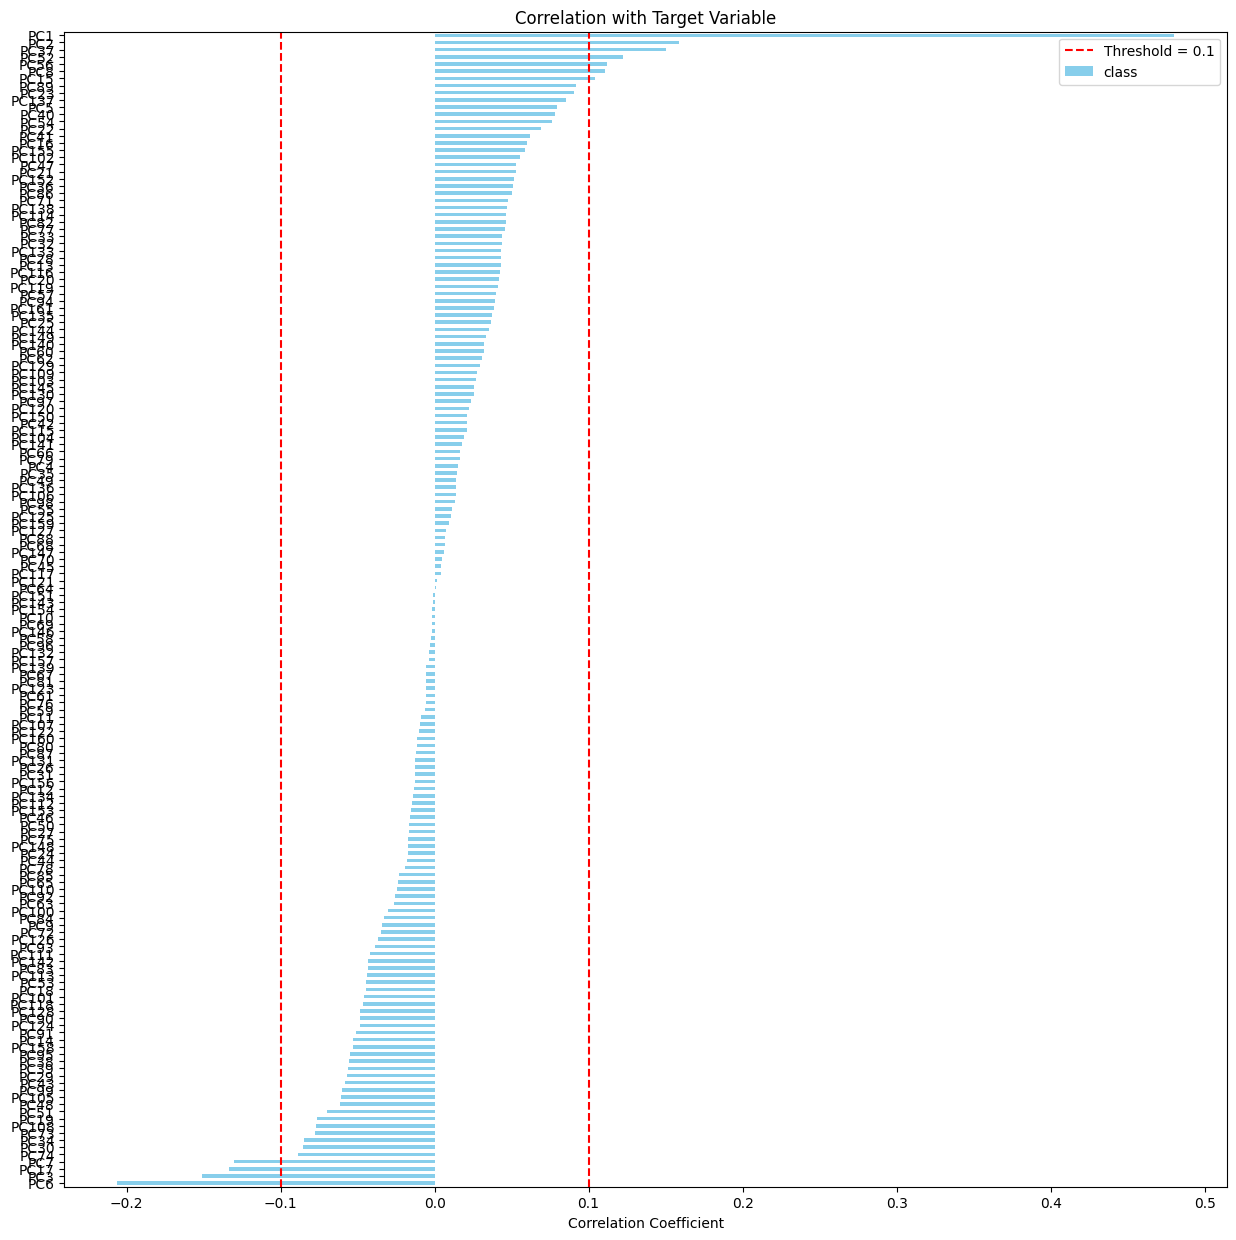

In [74]:
target = 'class'
threshold = 0.1

corr_with_target = pca_df.corr()[target].drop(target)

plt.figure(figsize=(15, 15))
corr_with_target.sort_values().plot(kind='barh', color='skyblue')
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.axvline(x=-threshold, color='red', linestyle='--')
plt.title("Correlation with Target Variable")
plt.xlabel("Correlation Coefficient")
plt.legend()
plt.show()

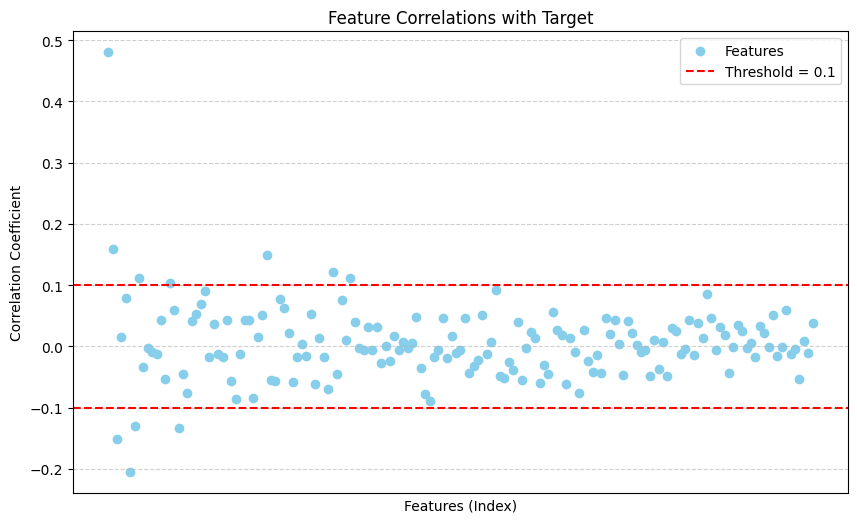

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(corr_with_target)), corr_with_target, color="skyblue", label="Features")
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.axhline(y=-threshold, color='red', linestyle='--')
plt.title("Feature Correlations with Target")
plt.xlabel("Features (Index)")
plt.ylabel("Correlation Coefficient")
plt.xticks([])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Un seuil de `0.1` a été choisi pour conserver les caractéristiques ayant une corrélation faible mais significative avec la cible, tout en supprimant celles avec une influence négligeable. Cela équilibre la réduction de dimensionnalité et la pertinence des variables. Ce seuil est adapté si les données contiennent des relations complexes ou non linéaires.

In [76]:
target = 'class'

corr_with_target = pca_df.corr()[target]

threshold = 0.1

drop_columns = corr_with_target[corr_with_target.abs() < threshold].index

filter_features = pca_df.drop(columns=drop_columns)

print(f"Les caractéristiques restantes: {filter_features.columns}")

Les caractéristiques restantes: Index(['PC1', 'PC2', 'PC3', 'PC6', 'PC7', 'PC8', 'PC15', 'PC17', 'PC37',
       'PC52', 'PC56', 'class'],
      dtype='object')


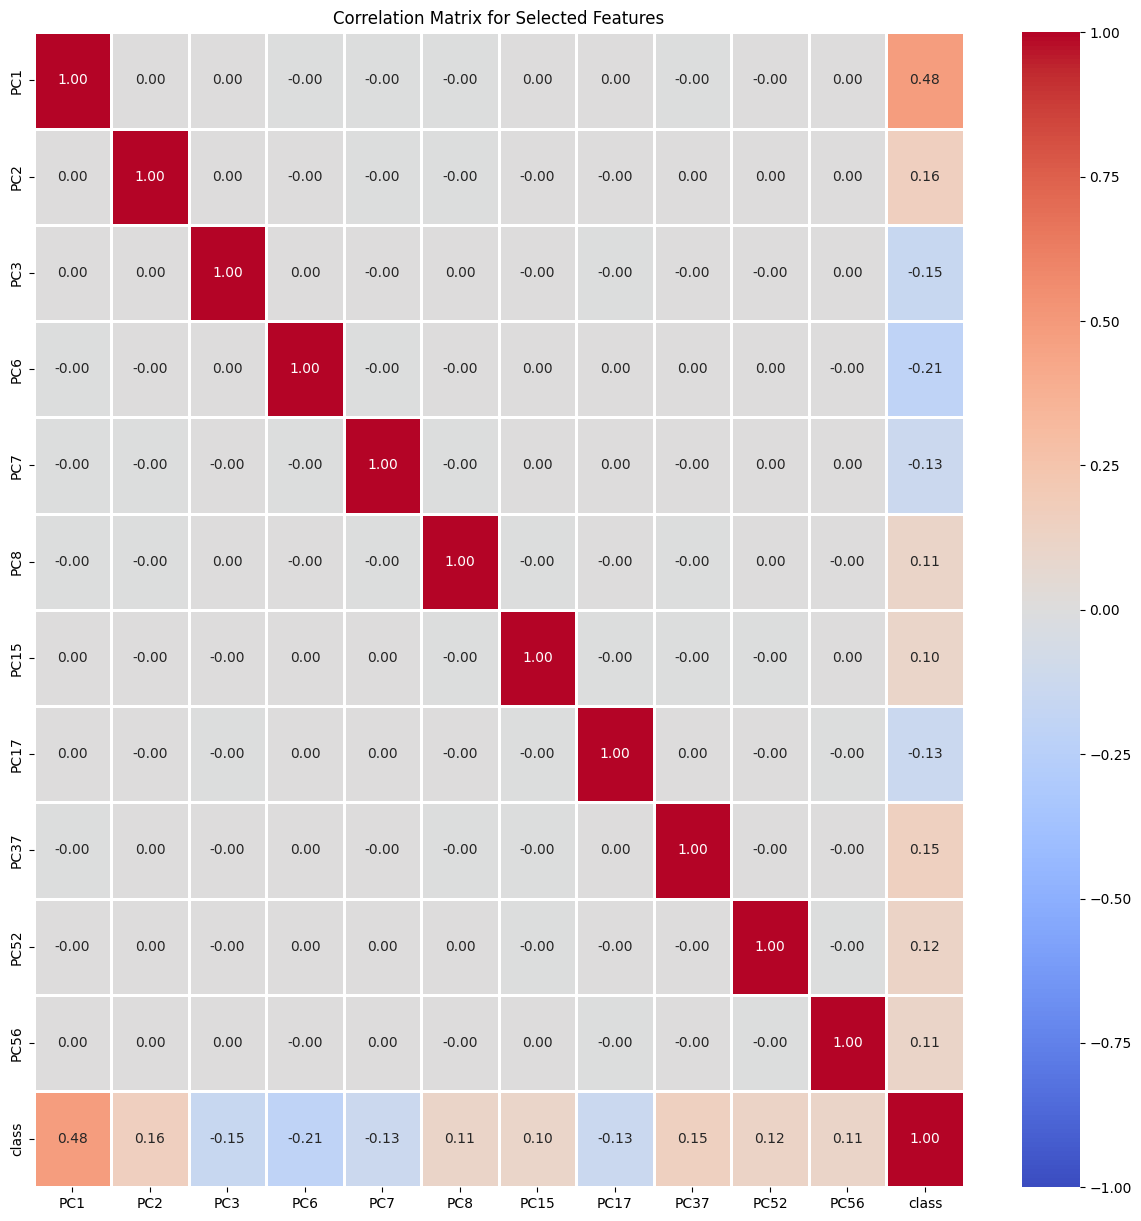

In [77]:
selected_corr_matrix = filter_features.corr()

plt.figure(figsize=(15, 15))  
sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, vmin=-1, vmax=1)
plt.title('Correlation Matrix for Selected Features')
plt.show()

### **- Selection en ultilisant la methode `Embedding`**

L'algorithme `LassoCV` sélectionne automatiquement les caractéristiques importantes en imposant une régularisation 
`L1`, ce qui force certains coefficients à zéro. Grâce à la validation croisée, il optimise le paramètre de régularisation pour conserver uniquement les variables pertinentes.

In [78]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X, y)

embedded_features = X.columns[(lasso.coef_ != 0)]
print(f"Les caractéristiques restantes: {embedded_features}")

Les caractéristiques restantes: Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC11',
       ...
       'PC137', 'PC138', 'PC140', 'PC142', 'PC144', 'PC149', 'PC152', 'PC155',
       'PC158', 'PC161'],
      dtype='object', length=102)


### **- Selection en ultilisant la methode `Wrapping` par `Backward Elimination`**

#### **Logistic Regression**

Cette fonction applique l'élimination récursive des caractéristiques en utilisant la régression logistique avec descente de gradient. Les caractéristiques ayant une valeur `p` supérieure au seuil (non significatives) sont supprimées, jusqu'à ce que toutes les restantes soient statistiquement pertinentes.

In [79]:
from scipy.stats import norm

def backward_elimination_with_custom_lr(X, y, significance_level=0.05, learning_rate=0.01, epochs=1000):
    remaining_features = list(range(X.shape[1])) 
    
    while len(remaining_features) > 0:
        X_subset = X.iloc[:, remaining_features].to_numpy() if isinstance(X, pd.DataFrame) else X[:, remaining_features]
        
        w, b = fit(X_subset, y.to_numpy(), learning_rate, epochs) 
        
        m, n = X_subset.shape
        
        z_scores = np.abs(w.flatten() / (np.std(X_subset, axis=0) / np.sqrt(m)))
        
        p_values = 2 * (1 - norm.cdf(z_scores))
        
        max_p_value = max(p_values)
        
        if max_p_value > significance_level:
            max_p_index = np.argmax(p_values)
            feature_to_remove = remaining_features[max_p_index]
            print(f"Removing feature {X.columns[remaining_features[max_p_index]]} with p-value {max_p_value:.4f}")
            
            remaining_features.remove(feature_to_remove)
        else:
            break
    
    return X.columns[remaining_features]

wrapper_features_lr = backward_elimination_with_custom_lr(X, y, significance_level=0.01)
print("Selected features:", wrapper_features_lr.tolist())

Removing feature PC59 with p-value 0.9893
Removing feature PC61 with p-value 0.9889
Removing feature PC96 with p-value 0.9941
Removing feature PC127 with p-value 0.9862
Removing feature PC55 with p-value 0.9521
Removing feature PC31 with p-value 0.9629
Removing feature PC4 with p-value 0.9489
Removing feature PC88 with p-value 0.9284
Removing feature PC11 with p-value 0.9217
Removing feature PC157 with p-value 0.9142
Removing feature PC27 with p-value 0.9032
Removing feature PC64 with p-value 0.9010
Removing feature PC5 with p-value 0.8929
Removing feature PC26 with p-value 0.9524
Removing feature PC13 with p-value 0.7714
Removing feature PC46 with p-value 0.7488
Removing feature PC76 with p-value 0.7196
Removing feature PC87 with p-value 0.7089
Removing feature PC151 with p-value 0.6997
Removing feature PC10 with p-value 0.6767
Removing feature PC12 with p-value 0.6739
Removing feature PC3 with p-value 0.6868
Removing feature PC58 with p-value 0.9966
Removing feature PC42 with p-value

#### **Random Forest**

Cette fonction effectue une élimination récursive des caractéristiques (backward elimination) en supprimant, une par une, celles dont la suppression n'entraîne pas une diminution significative ou améliore la précision d'un modèle de forêt aléatoire. Elle s'arrête lorsque retirer des caractéristiques n'améliore plus la précision, et retourne les caractéristiques restantes.

In [80]:
def backward_elimination(X, y, test_size=0.2, random_state=42):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    trees = random_forest(X_train, y_train, n_trees=5, max_depth=3)
    initial_test_preds = predict_forest(trees, X_test)
    baseline_accuracy = accuracy_score(y_test, majority_vote(initial_test_preds))
    print(f'Initial test accuracy: {baseline_accuracy:.2f}')

    removal_count = 0

    while len(X_train.columns) > 1:
        feature_to_remove = None
        best_accuracy = baseline_accuracy

        for feature in X_train.columns:

            X_train_temp = X_train.drop(columns=feature)
            X_test_temp = X_test.drop(columns=feature)

            trees = random_forest(X_train_temp, y_train, n_trees=5, max_depth=3)
            new_test_preds = predict_forest(trees, X_test_temp)
            new_test_accuracy = accuracy_score(y_test, majority_vote(new_test_preds))

            print(f'Considering removal of feature: {feature}')
            print(f'Accuracy before removal: {baseline_accuracy:.2f}')
            print(f'Accuracy after removal: {new_test_accuracy:.2f}')

            if new_test_accuracy >= baseline_accuracy + 0.05:
                if new_test_accuracy > best_accuracy:
                    best_accuracy = new_test_accuracy
                    feature_to_remove = feature

        if feature_to_remove is not None:
            print(f'Removing feature: {feature_to_remove}')
            X_train = X_train.drop(columns=feature_to_remove)
            X_test = X_test.drop(columns=feature_to_remove)
            baseline_accuracy = best_accuracy
            removal_count += 1
            print(f'Feature removed. Total features removed: {removal_count}')
        else:
            print('No feature removal resulted in improved accuracy by 0.05 or more. Stopping.')
            break

    print(f'Total number of features removed: {removal_count}')
    return X_train.columns.tolist()

wrapper_features_rf = backward_elimination(X, y)
print("Selected features:", wrapper_features_rf)

Initial test accuracy: 70.35
Considering removal of feature: PC1
Accuracy before removal: 70.35
Accuracy after removal: 67.26
Considering removal of feature: PC2
Accuracy before removal: 70.35
Accuracy after removal: 71.24
Considering removal of feature: PC3
Accuracy before removal: 70.35
Accuracy after removal: 70.35
Considering removal of feature: PC4
Accuracy before removal: 70.35
Accuracy after removal: 70.35
Considering removal of feature: PC5
Accuracy before removal: 70.35
Accuracy after removal: 70.35
Considering removal of feature: PC6
Accuracy before removal: 70.35
Accuracy after removal: 68.14
Considering removal of feature: PC7
Accuracy before removal: 70.35
Accuracy after removal: 70.35
Considering removal of feature: PC8
Accuracy before removal: 70.35
Accuracy after removal: 70.35
Considering removal of feature: PC9
Accuracy before removal: 70.35
Accuracy after removal: 70.35
Considering removal of feature: PC10
Accuracy before removal: 70.35
Accuracy after removal: 70.35


#### **LightGBM**

En applique le meme concept avec `LightGBM`

In [81]:
def backward_elimination_with_custom_lightgbm(X, y, test_size=0.2, random_state=42, 
                                              n_estimators=20, learning_rate=0.2, max_depth=4):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    trees, bins = train_lightgbm(X_train.values, y_train.values, n_estimators=n_estimators, 
                                  max_depth=max_depth, n_bins=32)
    y_pred = predict_lightgbm(trees, bins, X_test.values)
    baseline_accuracy = accuracy_score(y_test, y_pred)
    print(f'Initial test accuracy: {baseline_accuracy:.2f}')

    removal_count = 0

    while len(X_train.columns) > 1:
        feature_to_remove = None
        best_accuracy = baseline_accuracy

        for feature in X_train.columns:
            X_train_temp = X_train.drop(columns=feature)
            X_test_temp = X_test.drop(columns=feature)

            trees, bins = train_lightgbm(X_train_temp.values, y_train.values, n_estimators=n_estimators, 
                                          max_depth=max_depth, n_bins=32)
            y_pred_temp = predict_lightgbm(trees, bins, X_test_temp.values)
            new_test_accuracy = accuracy_score(y_test, y_pred_temp)

            print(f'Considering removal of feature: {feature}')
            print(f'Accuracy before removal: {baseline_accuracy:.2f}')
            print(f'Accuracy after removal: {new_test_accuracy:.2f}')

            if new_test_accuracy >= baseline_accuracy + 0.05:
                if new_test_accuracy > best_accuracy:
                    best_accuracy = new_test_accuracy
                    feature_to_remove = feature

        if feature_to_remove is not None:
            print(f'Removing feature: {feature_to_remove}')
            X_train = X_train.drop(columns=feature_to_remove)
            X_test = X_test.drop(columns=feature_to_remove)
            baseline_accuracy = best_accuracy
            removal_count += 1
            print(f'Feature removed. Total features removed: {removal_count}')
        else:
            print('No feature removal resulted in improved accuracy by 0.05 or more. Stopping.')
            break

    print(f'Total number of features removed: {removal_count}')
    return X_train.columns.tolist()

wrapper_features_lightgbm = backward_elimination_with_custom_lightgbm(X, y)
print("LGBM Selected Features:", wrapper_features_lightgbm)

Initial test accuracy: 85.84
Considering removal of feature: PC1
Accuracy before removal: 85.84
Accuracy after removal: 80.09
Considering removal of feature: PC2
Accuracy before removal: 85.84
Accuracy after removal: 88.05
Considering removal of feature: PC3
Accuracy before removal: 85.84
Accuracy after removal: 87.61
Considering removal of feature: PC4
Accuracy before removal: 85.84
Accuracy after removal: 87.61
Considering removal of feature: PC5
Accuracy before removal: 85.84
Accuracy after removal: 86.28
Considering removal of feature: PC6
Accuracy before removal: 85.84
Accuracy after removal: 85.40
Considering removal of feature: PC7
Accuracy before removal: 85.84
Accuracy after removal: 86.28
Considering removal of feature: PC8
Accuracy before removal: 85.84
Accuracy after removal: 86.73
Considering removal of feature: PC9
Accuracy before removal: 85.84
Accuracy after removal: 85.84
Considering removal of feature: PC10
Accuracy before removal: 85.84
Accuracy after removal: 87.17


### **- Unification de toutes les caractéristiques sélectionnées**

#### **Logistic Regression Freatures Selection**

In [82]:
remaining_features_set = set(filter_features.columns)  
selected_features_rf_set = set(embedded_features)  
selected_features_backward_set = set(wrapper_features_lr)  

combined_selected_features = remaining_features_set.union(selected_features_rf_set).union(selected_features_backward_set)

print("Unification des caractéristiques sélectionnées pour la Logistic Regression:", list(combined_selected_features))

Unification des caractéristiques sélectionnées pour la Logistic Regression: ['PC65', 'PC101', 'PC56', 'PC128', 'PC27', 'PC119', 'PC126', 'PC7', 'PC57', 'PC19', 'PC29', 'PC100', 'PC74', 'PC22', 'PC9', 'PC133', 'PC54', 'PC118', 'PC51', 'PC60', 'PC129', 'PC44', 'PC92', 'PC53', 'PC20', 'PC21', 'PC63', 'PC84', 'PC158', 'PC72', 'PC32', 'PC95', 'PC142', 'PC161', 'PC103', 'PC34', 'PC13', 'PC111', 'class', 'PC105', 'PC71', 'PC52', 'PC8', 'PC4', 'PC114', 'PC155', 'PC33', 'PC116', 'PC12', 'PC47', 'PC2', 'PC28', 'PC77', 'PC85', 'PC89', 'PC11', 'PC5', 'PC17', 'PC16', 'PC25', 'PC62', 'PC41', 'PC137', 'PC15', 'PC113', 'PC82', 'PC135', 'PC152', 'PC149', 'PC91', 'PC30', 'PC38', 'PC35', 'PC90', 'PC39', 'PC108', 'PC83', 'PC6', 'PC48', 'PC144', 'PC73', 'PC42', 'PC1', 'PC124', 'PC3', 'PC99', 'PC24', 'PC43', 'PC109', 'PC138', 'PC26', 'PC14', 'PC37', 'PC140', 'PC86', 'PC46', 'PC102', 'PC23', 'PC40', 'PC94', 'PC36', 'PC93', 'PC18']


In [83]:
df_lr = pca_df[list(combined_selected_features)]

print(f"Nombre des caractéristiques sélectionnées pour la Logistic Regression: {df_lr.shape[1]}")

Nombre des caractéristiques sélectionnées pour la Logistic Regression: 103


#### **Random Forest Features Selection**

In [84]:
remaining_features_set = set(filter_features.columns)  
selected_features_rf_set = set(embedded_features)  
selected_set = set(wrapper_features_rf)

combined_selected_features_rf = remaining_features_set.union(selected_set).union(selected_features_backward_set)

print("Unification des caractéristiques sélectionnées pour Random Forest:", list(combined_selected_features))

Unification des caractéristiques sélectionnées pour Random Forest: ['PC65', 'PC101', 'PC56', 'PC128', 'PC27', 'PC119', 'PC126', 'PC7', 'PC57', 'PC19', 'PC29', 'PC100', 'PC74', 'PC22', 'PC9', 'PC133', 'PC54', 'PC118', 'PC51', 'PC60', 'PC129', 'PC44', 'PC92', 'PC53', 'PC20', 'PC21', 'PC63', 'PC84', 'PC158', 'PC72', 'PC32', 'PC95', 'PC142', 'PC161', 'PC103', 'PC34', 'PC13', 'PC111', 'class', 'PC105', 'PC71', 'PC52', 'PC8', 'PC4', 'PC114', 'PC155', 'PC33', 'PC116', 'PC12', 'PC47', 'PC2', 'PC28', 'PC77', 'PC85', 'PC89', 'PC11', 'PC5', 'PC17', 'PC16', 'PC25', 'PC62', 'PC41', 'PC137', 'PC15', 'PC113', 'PC82', 'PC135', 'PC152', 'PC149', 'PC91', 'PC30', 'PC38', 'PC35', 'PC90', 'PC39', 'PC108', 'PC83', 'PC6', 'PC48', 'PC144', 'PC73', 'PC42', 'PC1', 'PC124', 'PC3', 'PC99', 'PC24', 'PC43', 'PC109', 'PC138', 'PC26', 'PC14', 'PC37', 'PC140', 'PC86', 'PC46', 'PC102', 'PC23', 'PC40', 'PC94', 'PC36', 'PC93', 'PC18']


In [85]:
df_rf = pca_df[list(combined_selected_features_rf)]

print(f"Nombre des caractéristiques sélectionnées pour Random Forest: {df_rf.shape[1]}")

Nombre des caractéristiques sélectionnées pour Random Forest: 158


#### **LightGBM Features Selection**

In [86]:
remaining_features_set = set(filter_features.columns)  
selected_features_set = set(embedded_features)  
selected_features_backward_set = set(wrapper_features_lightgbm)

combined_selected_features_gbm = remaining_features_set.union(selected_features_set).union(selected_features_backward_set)

print("Unification des caractéristiques sélectionnées pour LightGBM:", list(combined_selected_features))

Unification des caractéristiques sélectionnées pour LightGBM: ['PC65', 'PC101', 'PC56', 'PC128', 'PC27', 'PC119', 'PC126', 'PC7', 'PC57', 'PC19', 'PC29', 'PC100', 'PC74', 'PC22', 'PC9', 'PC133', 'PC54', 'PC118', 'PC51', 'PC60', 'PC129', 'PC44', 'PC92', 'PC53', 'PC20', 'PC21', 'PC63', 'PC84', 'PC158', 'PC72', 'PC32', 'PC95', 'PC142', 'PC161', 'PC103', 'PC34', 'PC13', 'PC111', 'class', 'PC105', 'PC71', 'PC52', 'PC8', 'PC4', 'PC114', 'PC155', 'PC33', 'PC116', 'PC12', 'PC47', 'PC2', 'PC28', 'PC77', 'PC85', 'PC89', 'PC11', 'PC5', 'PC17', 'PC16', 'PC25', 'PC62', 'PC41', 'PC137', 'PC15', 'PC113', 'PC82', 'PC135', 'PC152', 'PC149', 'PC91', 'PC30', 'PC38', 'PC35', 'PC90', 'PC39', 'PC108', 'PC83', 'PC6', 'PC48', 'PC144', 'PC73', 'PC42', 'PC1', 'PC124', 'PC3', 'PC99', 'PC24', 'PC43', 'PC109', 'PC138', 'PC26', 'PC14', 'PC37', 'PC140', 'PC86', 'PC46', 'PC102', 'PC23', 'PC40', 'PC94', 'PC36', 'PC93', 'PC18']


In [87]:
df_LightGBM = pca_df[list(combined_selected_features_gbm)]

print(f"Nombre des caractéristiques sélectionnées pour LightGBM: {df_LightGBM.shape[1]}")

Nombre des caractéristiques sélectionnées pour LightGBM: 162


## **6. Evaluation des modeles apres la selection des caractéristiques**

### **- Logistic Regression Features**

In [88]:
X_final = df_lr.drop(columns=['class'])
y_final = df_lr['class']  

X_final_train,X_final_test,y_final_train,y_final_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

**Logistic Regression Model**

In [89]:
w, b = fit(X_final_train, y_final_train, learning_rate=0.01, epochs=1000)

predictions_final = predict_lr(X_final_test, w, b)
predictions_final_tr = predict_lr(X_final_train, w, b)

print("Logistic Regression:\n")
print("Test Classification Report:\n")
print(classification_report(y_test, y_pred),"\n")
print("Train Classification Report:\n")
print(classification_report(y_train, predictions_final_tr))

Logistic Regression:

Test Classification Report:

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       107
         1.0       0.88      0.84      0.86       119

    accuracy                           0.86       226
   macro avg       0.86      0.86      0.86       226
weighted avg       0.86      0.86      0.86       226
 

Train Classification Report:

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       456
         1.0       0.93      0.90      0.91       444

    accuracy                           0.92       900
   macro avg       0.92      0.92      0.92       900
weighted avg       0.92      0.92      0.92       900



**Random Forest Modele**

In [90]:
forest = random_forest(X_final_train, y_final_train, n_trees=5, max_depth=6)
predictions = predict_forest(forest, X_final_test)
predictions_trn = predict_forest(forest, X_final_train)
y_pred = majority_vote(predictions)
y_pred_tr = majority_vote(predictions_trn)
print("Random Forest:\n")
print("Test Classification Report:\n")
print(classification_report(y_test, y_pred),"\n")
print("Train Classification Report:\n")
print(classification_report(y_train, y_pred_tr))

Random Forest:

Test Classification Report:

              precision    recall  f1-score   support

         0.0       0.79      0.82      0.81       107
         1.0       0.83      0.81      0.82       119

    accuracy                           0.81       226
   macro avg       0.81      0.81      0.81       226
weighted avg       0.81      0.81      0.81       226
 

Train Classification Report:

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89       456
         1.0       0.89      0.89      0.89       444

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



**LightGBM Modele**

In [91]:
trees, bins = train_lightgbm(X_final_train.values, y_final_train.values, n_estimators=20, max_depth=4, n_bins=32)
y_pred = predict_lightgbm(trees, bins, X_final_test.values)
y_pred_trn = predict_lightgbm(trees, bins, X_final_train.values)
print("LightGBM:\n")
print("Train Classification Report:\n")
print(classification_report(y_test, y_pred),"\n")
print("Test Classification Report:\n")
print(classification_report(y_train, y_pred_trn))

LightGBM:

Train Classification Report:

              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       107
         1.0       0.89      0.82      0.86       119

    accuracy                           0.85       226
   macro avg       0.85      0.86      0.85       226
weighted avg       0.86      0.85      0.85       226
 

Test Classification Report:

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       456
         1.0       0.96      0.96      0.96       444

    accuracy                           0.96       900
   macro avg       0.96      0.96      0.96       900
weighted avg       0.96      0.96      0.96       900



### **- Random Forest Features Selection**

In [92]:
X_final = df_rf.drop(columns=['class'])
y_final = df_rf['class']

X_final_train,X_final_test,y_final_train,y_final_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

**Logistic Regression Model**

In [93]:
w, b = fit(X_final_train, y_final_train, learning_rate=0.01, epochs=1000)

predictions_final = predict_lr(X_final_test, w, b)
predictions_final_tr = predict_lr(X_final_train, w, b)

print("Test Classification Report:\n")
print(classification_report(y_test, y_pred),"\n")
print("Train Classification Report:\n")
print(classification_report(y_train, predictions_final_tr))

Test Classification Report:

              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       107
         1.0       0.89      0.82      0.86       119

    accuracy                           0.85       226
   macro avg       0.85      0.86      0.85       226
weighted avg       0.86      0.85      0.85       226
 

Train Classification Report:

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92       456
         1.0       0.93      0.90      0.92       444

    accuracy                           0.92       900
   macro avg       0.92      0.92      0.92       900
weighted avg       0.92      0.92      0.92       900



**Random Forest Modele**

In [94]:
forest = random_forest(X_final_train, y_final_train, n_trees=5, max_depth=6)
predictions = predict_forest(forest, X_final_test)
predictions_trn = predict_forest(forest, X_final_train)
y_pred = majority_vote(predictions)
y_pred_tr = majority_vote(predictions_trn)
print("Random Forest:\n")
print("Test Classification Report:\n")
print(classification_report(y_test, y_pred),"\n")
print("Train Classification Report:\n")
print(classification_report(y_train, y_pred_tr))

Random Forest:

Test Classification Report:

              precision    recall  f1-score   support

         0.0       0.76      0.76      0.76       107
         1.0       0.78      0.78      0.78       119

    accuracy                           0.77       226
   macro avg       0.77      0.77      0.77       226
weighted avg       0.77      0.77      0.77       226
 

Train Classification Report:

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89       456
         1.0       0.88      0.90      0.89       444

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



**LightGBM Modele**

In [95]:
trees, bins = train_lightgbm(X_final_train.values, y_final_train.values, n_estimators=20, max_depth=4, n_bins=32)
y_pred = predict_lightgbm(trees, bins, X_final_test.values)
y_pred_trn = predict_lightgbm(trees, bins, X_final_train.values)
print("LightGBM:\n")
print("Train Classification Report:\n")
print(classification_report(y_test, y_pred),"\n")
print("Test Classification Report:\n")
print(classification_report(y_train, y_pred_trn))

LightGBM:

Train Classification Report:

              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86       107
         1.0       0.90      0.82      0.86       119

    accuracy                           0.86       226
   macro avg       0.86      0.86      0.86       226
weighted avg       0.86      0.86      0.86       226
 

Test Classification Report:

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96       456
         1.0       0.95      0.98      0.96       444

    accuracy                           0.96       900
   macro avg       0.96      0.96      0.96       900
weighted avg       0.96      0.96      0.96       900



### **- LightGBM Features Selection**

In [96]:
X_final = df_LightGBM.drop(columns=['class'])
y_final = df_LightGBM['class']

X_final_train,X_final_test,y_final_train,y_final_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

**Logistic Regression Model**

In [97]:
w, b = fit(X_final_train, y_final_train, learning_rate=0.01, epochs=1000)

predictions_final = predict_lr(X_final_test, w, b)
predictions_final_tr = predict_lr(X_final_train, w, b)
print("Logistic Regression:\n")
print("Test Classification Report:\n")
print(classification_report(y_test, y_pred),"\n")
print("Train Classification Report:\n")
print(classification_report(y_train, predictions_final_tr))

Logistic Regression:

Test Classification Report:

              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86       107
         1.0       0.90      0.82      0.86       119

    accuracy                           0.86       226
   macro avg       0.86      0.86      0.86       226
weighted avg       0.86      0.86      0.86       226
 

Train Classification Report:

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       456
         1.0       0.93      0.92      0.93       444

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



**Random Forest Modele**

In [98]:
forest = random_forest(X_final_train, y_final_train, n_trees=5, max_depth=6)
predictions = predict_forest(forest, X_final_test)
predictions_trn = predict_forest(forest, X_final_train)
y_pred = majority_vote(predictions)
y_pred_tr = majority_vote(predictions_trn)
print("Random Forest:\n")
print("Test Classification Report:\n")
print(classification_report(y_test, y_pred),"\n")
print("Train Classification Report:\n")
print(classification_report(y_train, y_pred_tr))

Random Forest:

Test Classification Report:

              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79       107
         1.0       0.80      0.82      0.81       119

    accuracy                           0.80       226
   macro avg       0.80      0.80      0.80       226
weighted avg       0.80      0.80      0.80       226
 

Train Classification Report:

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88       456
         1.0       0.87      0.89      0.88       444

    accuracy                           0.88       900
   macro avg       0.88      0.88      0.88       900
weighted avg       0.88      0.88      0.88       900



**LightGBM Modele**

In [101]:
trees, bins = train_lightgbm(X_final_train.values, y_final_train.values, n_estimators=20, max_depth=4, n_bins=32)
y_pred = predict_lightgbm(trees, bins, X_final_test.values)
y_pred_trn = predict_lightgbm(trees, bins, X_final_train.values)
print("LightGBM:\n")
print("Train Classification Report:\n")
print(classification_report(y_test, y_pred),"\n")
print("Test Classification Report:\n")
print(classification_report(y_train, y_pred_trn))

LightGBM:

Train Classification Report:

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       107
         1.0       0.88      0.84      0.86       119

    accuracy                           0.86       226
   macro avg       0.86      0.86      0.86       226
weighted avg       0.86      0.86      0.86       226
 

Test Classification Report:

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97       456
         1.0       0.95      0.98      0.97       444

    accuracy                           0.97       900
   macro avg       0.97      0.97      0.97       900
weighted avg       0.97      0.97      0.97       900



### **- Visualisation et comparaison**

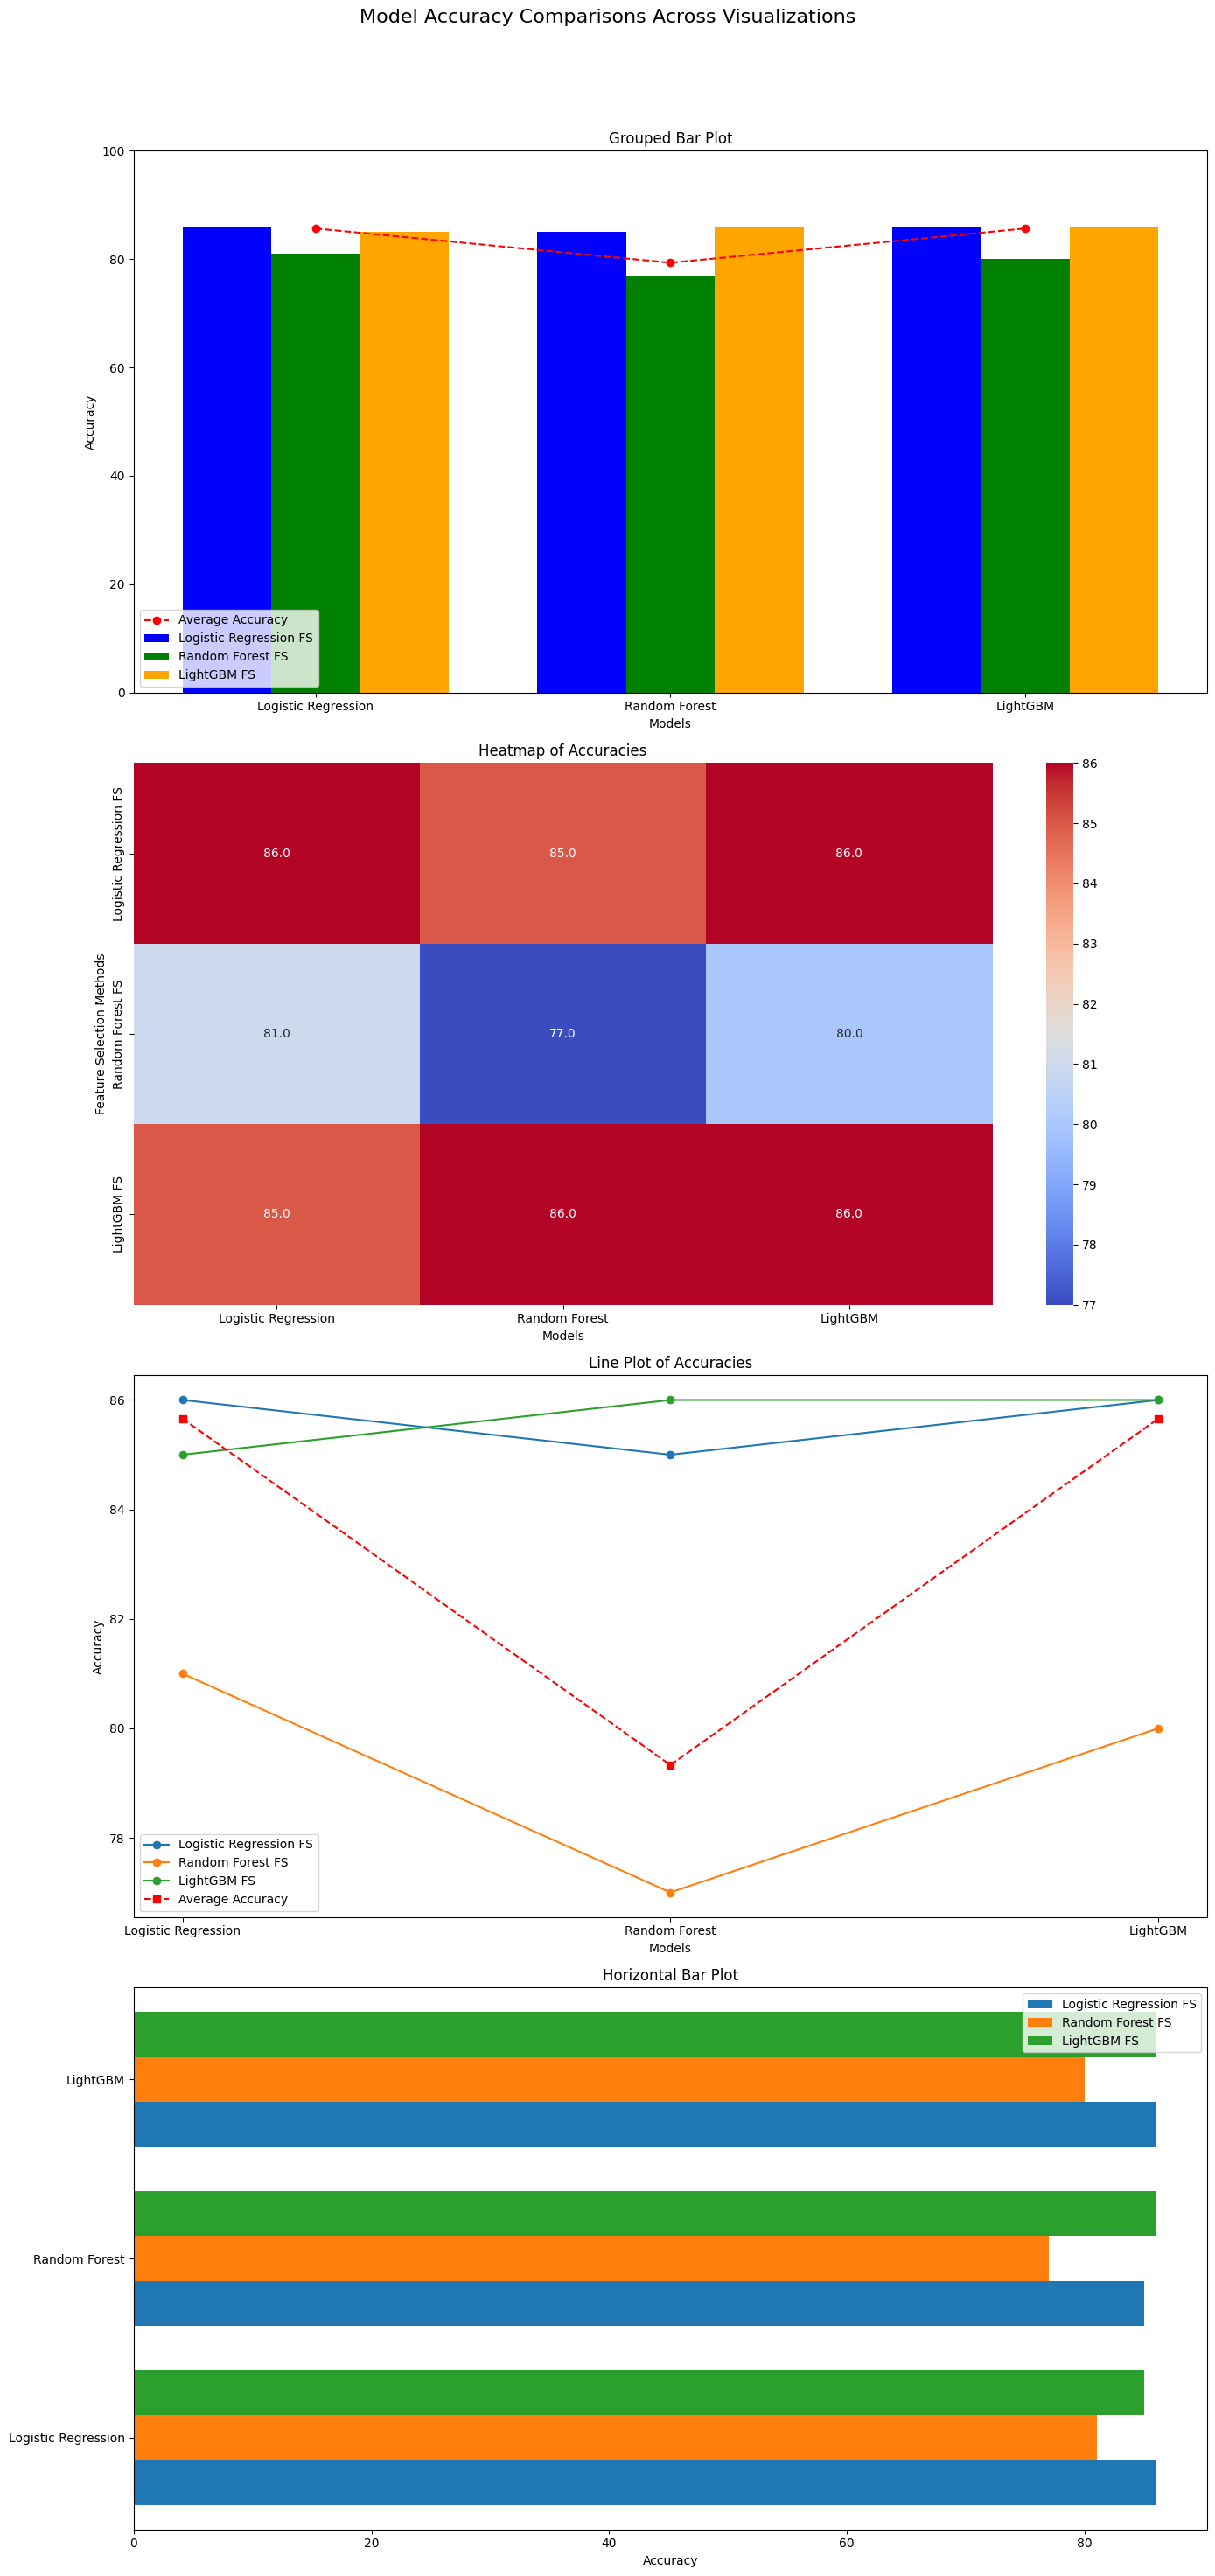

In [102]:
methods = ["Logistic Regression FS", "Random Forest FS", "LightGBM FS"]
models = ["Logistic Regression", "Random Forest", "LightGBM"]
accuracy_data = np.array([
    [86, 85, 86],  
    [81, 77, 80],  
    [85, 86, 86],  
])
averages = [85.66, 79.33, 85.66]  

fig, axes = plt.subplots(4, 1, figsize=(14, 30))  

x = np.arange(len(models))
width = 0.25
axes[0].bar(x - width, accuracy_data[0], width, label="Logistic Regression FS", color="blue")
axes[0].bar(x, accuracy_data[1], width, label="Random Forest FS", color="green")
axes[0].bar(x + width, accuracy_data[2], width, label="LightGBM FS", color="orange")
axes[0].plot(x, averages, marker="o", linestyle="--", color="red", label="Average Accuracy")
axes[0].set_title("Grouped Bar Plot")
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].set_xlabel("Models")
axes[0].set_ylabel("Accuracy")
axes[0].legend()
axes[0].set_ylim(0, 100)

sns.heatmap(
    accuracy_data,
    annot=True,
    fmt=".1f",
    cmap="coolwarm",
    xticklabels=models,
    yticklabels=methods,
    ax=axes[1]
)
axes[1].set_title("Heatmap of Accuracies")
axes[1].set_xlabel("Models")
axes[1].set_ylabel("Feature Selection Methods")

for i, method in enumerate(methods):
    axes[2].plot(models, accuracy_data[i], marker="o", label=method)
axes[2].plot(models, averages, marker="s", linestyle="--", color="red", label="Average Accuracy")
axes[2].set_title("Line Plot of Accuracies")
axes[2].set_ylabel("Accuracy")
axes[2].set_xlabel("Models")
axes[2].legend()

for i, method in enumerate(methods):
    axes[3].barh(x + i * width, accuracy_data[i], height=width, label=method)
axes[3].set_yticks(x + width)
axes[3].set_yticklabels(models)
axes[3].set_title("Horizontal Bar Plot")
axes[3].set_xlabel("Accuracy")
axes[3].legend()

plt.suptitle("Model Accuracy Comparisons Across Visualizations", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


## **7. Conclusion**

Ce projet a exploré l'application des techniques d'apprentissage supervisé pour la détection de la maladie de Parkinson à partir de données vocales, en mettant l'accent sur l'impact de la sélection des caractéristiques sur les performances des modèles. Trois algorithmes (Régression Logistique, Random Forest, LightGBM) ont été évalués avant et après l'application de techniques de sélection des caractéristiques. Les résultats montrent que la sélection des caractéristiques améliore significativement les performances des modèles en réduisant le bruit et la redondance des données. Ce travail souligne l'importance de la sélection des caractéristiques et du choix de l'algorithme pour optimiser la précision des modèles, ouvrant ainsi la voie à l'utilisation des données vocales dans le diagnostic précoce de la maladie de Parkinson.